In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [17]:
dt = pd.read_csv('introextro.csv')
dt

,Type,Friends,Studies,Parents,Sleep
0,Introvert,25,45,20,10
1,Introvert,10,60,15,15
2,Introvert,40,40,10,10
3,Introvert,15,50,15,20
4,Introvert,20,45,25,10
5,Introvert,30,50,10,10
6,Introvert,5,70,10,15
7,Introvert,12,65,13,10
8,Introvert,22,42,22,14
9,Introvert,25,49,10,16


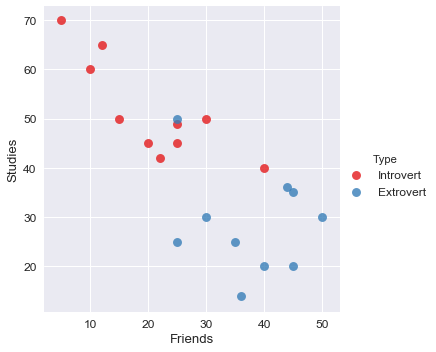

In [18]:
sns.lmplot('Friends', 'Studies', data=dt, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 80});

In [8]:
character = dt[['Friends','Studies']].as_matrix()
type_label = np.where(dt['Type']=='Introvert', 0, 1)


C:\anconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [9]:
model = svm.SVC(kernel='linear')
model.fit(character, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

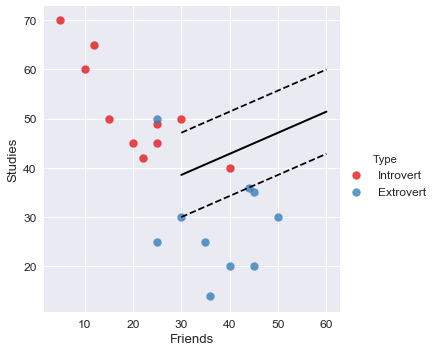

In [11]:
sns.lmplot('Friends', 'Studies', data=dt, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

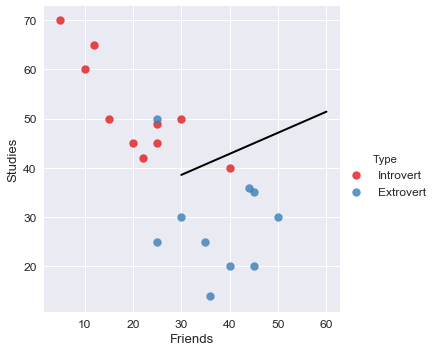

In [12]:
sns.lmplot('Friends', 'Studies', data=dt, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

In [13]:
def predict_character(Friends, Studies):
    if(model.predict([[Friends, Studies]]))==0:
        print('Take care... He is an Introvert!')
    else:
        print('No Worry....He is an Extrovert!')

In [14]:
predict_character(25,25)

No Worry....He is an Extrovert!


In [15]:
predict_character(25,45)

Take care... He is an Introvert!


In [14]:
predict_character(25,25)

No Worry....He is an Extrovert!
